In [ ]:
!pip install split-folders

In [ ]:
import tensorflow as tf
import os
import splitfolders
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
def predictclass(classes_arr):
  x = np.argmax(classes_arr)
  if (x == 0): 
    print('Golongan 1')
  elif (x == 1): 
    print('Golongan 2')
  elif (x == 2): 
    print('Golongan 3')
  elif (x == 3): 
    print('Golongan 4')
  else: 
    print('Golongan 5')

In [ ]:
import zipfile
local_zip = 'Mobil2.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

In [ ]:
splitfolders.ratio ("Mobil", output= "Mobil/", seed = 2188, ratio= (.7, .3))

Copying files: 256 files [00:00, 5707.02 files/s]


In [ ]:
class callbackz(tf.keras.callbacks.Callback):
	def on_epoch_end(self, epoch, logs={}):
		if(logs.get('val_accuracy') > 0.7):
			print("\n The accuracy reached above 0.7, stopping the epoch...")
			self.model.stop_training = True

In [ ]:
train_datagen = ImageDataGenerator( fill_mode = 'nearest', rescale=1/.255)
test_datagen = ImageDataGenerator(fill_mode = 'nearest', rescale=1/.255)

In [ ]:
train_generator = train_datagen.flow_from_directory('Mobil/train',target_size=(150, 200), batch_size= 5)
test_generator = train_datagen.flow_from_directory('Mobil/val',target_size=(150, 200), batch_size= 5)

Found 178 images belonging to 5 classes.
Found 78 images belonging to 5 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 200, 3)),
    tf.keras.layers.MaxPooling2D(3, 3),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(3,3),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(3,3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [ ]:
model.compile(loss= "categorical_crossentropy" ,optimizer=tf.optimizers.Adamax() ,metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator,steps_per_epoch=30, epochs=30, validation_data=test_generator, validation_steps=8, shuffle= True)

Epoch 1/30
30/30 [==============================] - 13s 386ms/step - loss: 52.9166 - accuracy: 0.1892 - val_loss: 2.1935 - val_accuracy: 0.1000
Epoch 2/30
30/30 [==============================] - 11s 377ms/step - loss: 2.1750 - accuracy: 0.1554 - val_loss: 1.6799 - val_accuracy: 0.2000
Epoch 3/30
30/30 [==============================] - 11s 373ms/step - loss: 1.6387 - accuracy: 0.2905 - val_loss: 1.5921 - val_accuracy: 0.3000
Epoch 4/30
30/30 [==============================] - 11s 375ms/step - loss: 1.6104 - accuracy: 0.2770 - val_loss: 1.5833 - val_accuracy: 0.2750
Epoch 5/30
30/30 [==============================] - 11s 378ms/step - loss: 1.5719 - accuracy: 0.2568 - val_loss: 1.5786 - val_accuracy: 0.2500
Epoch 6/30
30/30 [==============================] - 11s 375ms/step - loss: 1.5829 - accuracy: 0.3311 - val_loss: 1.4760 - val_accuracy: 0.3750
Epoch 7/30
30/30 [==============================] - 11s 376ms/step - loss: 1.5203 - accuracy: 0.3581 - val_loss: 1.5070 - val_accuracy: 0.450

Golongan 4


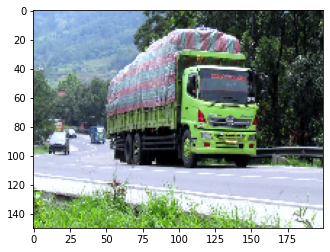

In [ ]:
img = image.load_img('/content/Mobil/Golongan 3/golongan3 (28).jpg', target_size=(150,200))
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict(images, batch_size=10)
predictclass(classes)

In [ ]:
acc = historym.history['accuracy']
val_acc = historym.history['val_accuracy']
loss = historym.history['loss']
val_loss = historym.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='best')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='best')
plt.title('Training and Validation Loss')
plt.show()